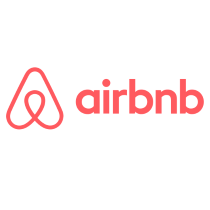

# Exploratory Data Analysis and Geospatial Visuaization

## Tasks:
### Data Wrangling (Cleaning)
### Statisical Analysis
### Visualization

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 2019 NYC Airbnb Data

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#viewing columns and rows
data.shape

(48895, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Descriptive statistics for numerical values
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
#Dropping columns that are unnecessary for our analysis
data.drop('id', axis = 1, inplace= True)
data.drop('host_name', axis = 1, inplace = True)
data.drop('calculated_host_listings_count', axis=1, inplace=True)
data.drop('last_review', axis = 1, inplace =True)

#Renaming columns
data = data.rename(columns={'neighbourhood_group': 'borough',
                            'neighbourhood': 'neighborhood',
                            'listing_price': 'price'})
data.columns

Index(['name', 'host_id', 'borough', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365'],
      dtype='object')

In [8]:
#checking for duplicated values
print(np.sum(data.duplicated()), 'values are duplicated.')

0 values are duplicated.


## Handling Missing Values

In [9]:
#counting null values for each value
missing_values_count = np.sum(data.isnull())
missing_values_count

name                    16
host_id                  0
borough                  0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month    10052
availability_365         0
dtype: int64

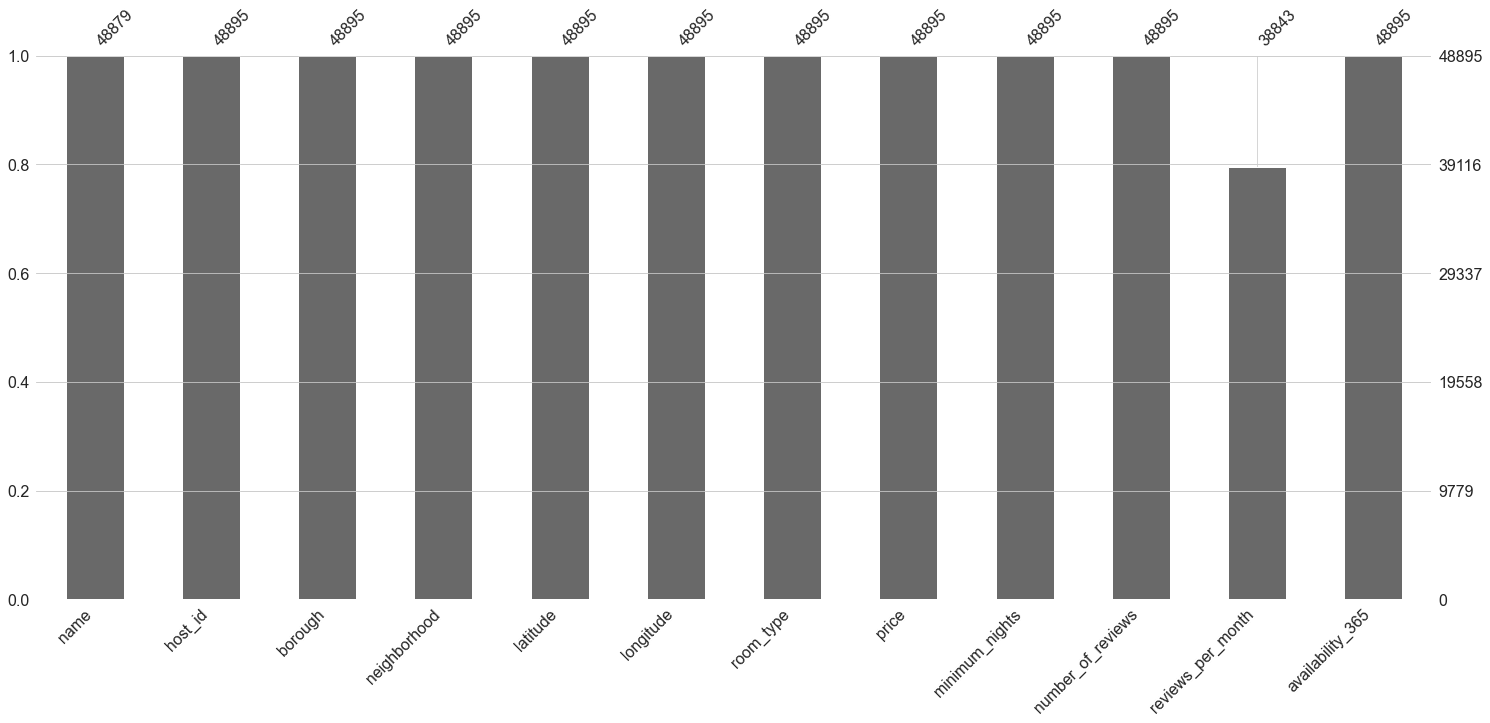

In [10]:
#visualizing missing data
import missingno as msno 


_ = msno.bar(data)

In [11]:
total_cells = np.product(data.shape)
total_missing =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing) 

Percentage of missing values in the dataset: 1.72


In [12]:
#Imputation of missing values with median values
data['reviews_per_month'] = data.reviews_per_month.fillna(data.reviews_per_month.median())

In [13]:
#Dropping null values and counting the dropped rows
cleaned_df = data.dropna(axis = 0, how ='any') #Dropping Rows with at least 1 null value
print(len(data) - len(cleaned_df ), 'rows were dropped with missing values.') 

16 rows were dropped with missing values.


In [14]:
np.sum(cleaned_df.isnull()) 

name                 0
host_id              0
borough              0
neighborhood         0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

In [15]:
#Excluding prices that are equal to zero
df = cleaned_df[cleaned_df['price'] != 0]

In [16]:
df.head()

,name,host_id,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


## Outliers

In [17]:
# calculate interquartile range
q25, q75 = np.percentile(cleaned_df.price, 25), np.percentile(cleaned_df.price, 75)
iqr = q75 - q25

In [18]:
#calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=69.000, 75th=175.000, IQR=106.000


In [19]:
# identify outliers
outliers = [x for x in cleaned_df.price if x < lower or x > upper]
print('Outliers observations:',len(outliers))

Outliers observations: 2971


In [20]:
#non outliers
non_outliers = [x for x in cleaned_df.price if x >= lower and x <= upper]
print('Non-outlier observations:', len(non_outliers))

Non-outlier observations: 45908


## Distribution

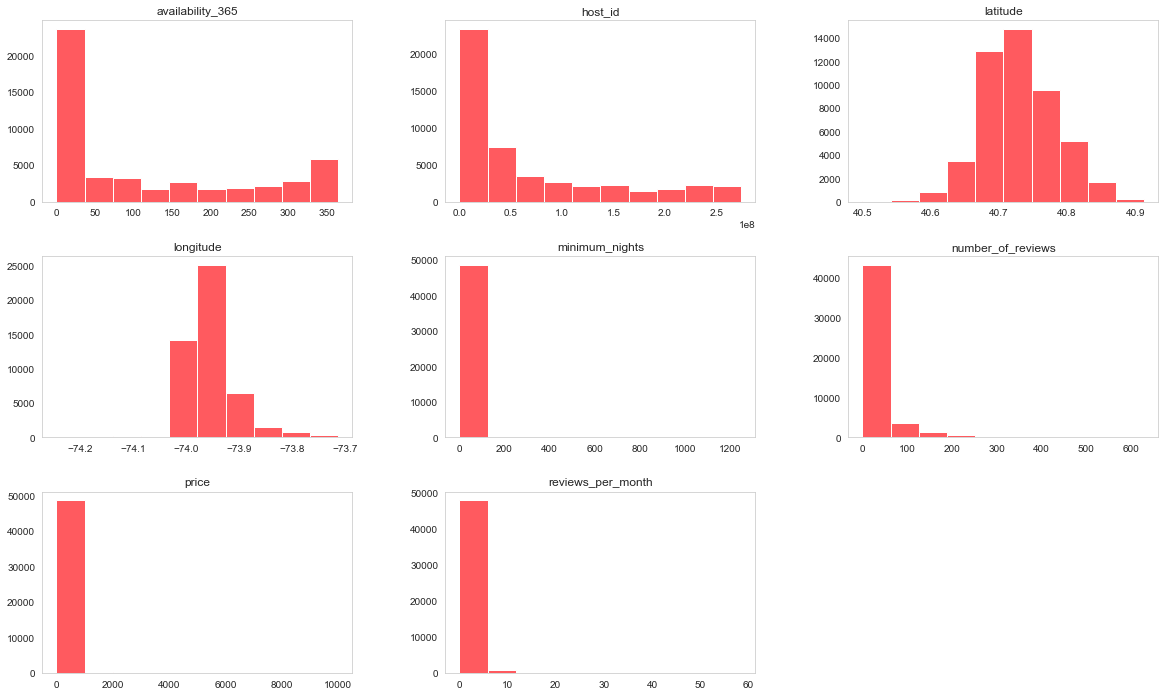

In [21]:
#Viewing distribution of numeric data
_ = df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

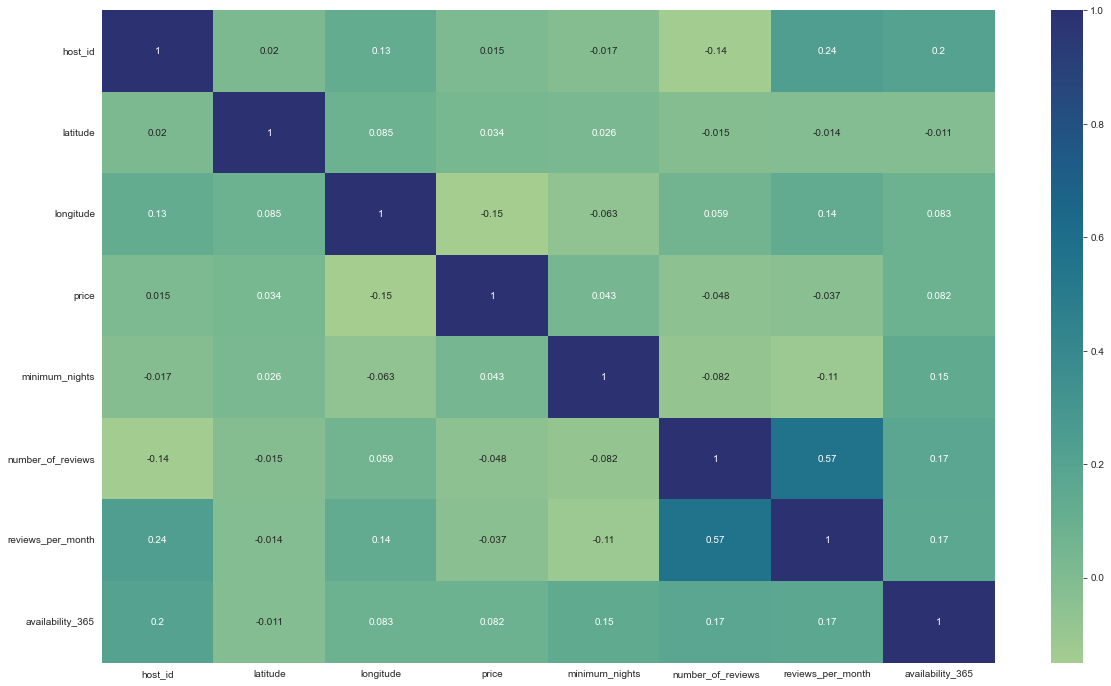

In [25]:
#Vewing correlation of the numerical values
plt.figure(figsize=(20,12))


abnb_corr = df.corr()
_ = sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="crest")

## Univariate Analysis

In [26]:
pip install --user wordcloud

Note: you may need to restart the kernel to use updated packages.


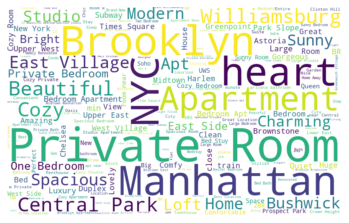

In [27]:
#Univariate analysis
from wordcloud import WordCloud

text = ' '.join([text for text in df['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(str(text))



plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [28]:
print('There are {} words in the listing description.'.format(len(text)))

There are 1852579 words in the listing description.


## Bivariate Analysis: Cross Tabulation

In [29]:
#Median Listing Price by borough
median_listing_price = df.groupby('borough')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)

borough
Manhattan        150
Brooklyn          90
Staten Island     75
Queens            75
Bronx             65
Name: price, dtype: int64

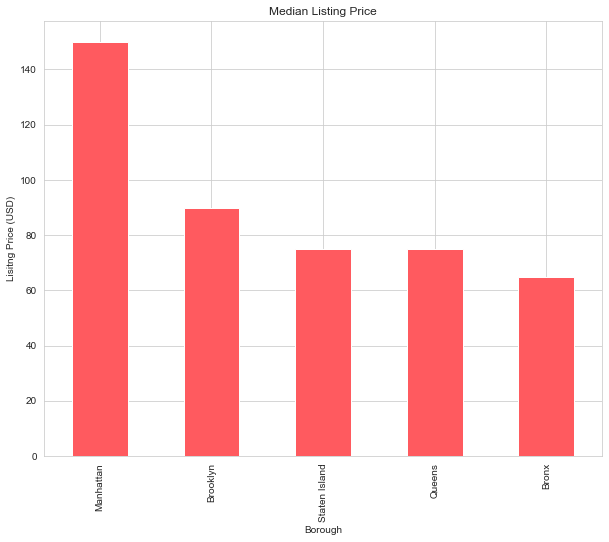

In [30]:
#Plotting median listing price
median_listing_price.plot(kind='bar', title = "Median Listing Price", figsize=(10,8), color = '#FF5A5F')
_ = plt.xlabel('Borough')
_ = plt.ylabel('Lisitng Price (USD)')

In [31]:
listings_boroughs = df.groupby('borough')['name'].count().sort_values(ascending = False)
listings_boroughs

borough
Manhattan        21651
Brooklyn         20089
Queens            5666
Bronx             1089
Staten Island      373
Name: name, dtype: int64

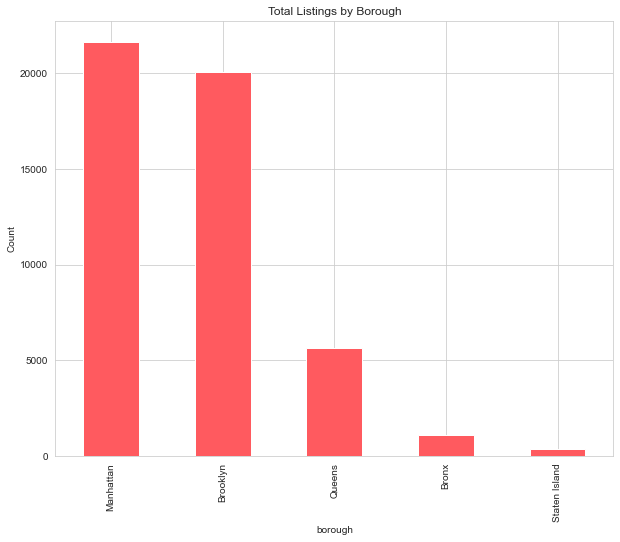

In [28]:
#plotting
listings_boroughs.plot(kind = 'bar', title = 'Total Listings by Borough',  figsize=(10,8), color = '#FF5A5F')
_ = plt.ylabel('Count')

In [32]:
#Median Listing Price By Room Type
median_price_room_type = df.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)

room_type
Entire home/apt    160
Private room        70
Shared room         45
Name: price, dtype: int64

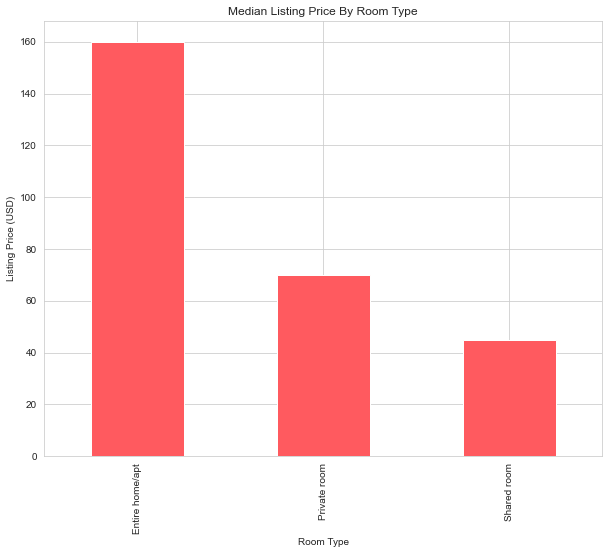

In [33]:
#Plotting 
median_price_room_type.plot(kind = 'bar', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#FF5A5F')
_ = plt.xlabel('Room Type')
_ = plt.ylabel('Listing Price (USD)')

In [34]:
reviews_room_type = df.groupby('room_type')['number_of_reviews'].agg('count')
reviews_room_type

room_type
Entire home/apt    25400
Private room       22311
Shared room         1157
Name: number_of_reviews, dtype: int64

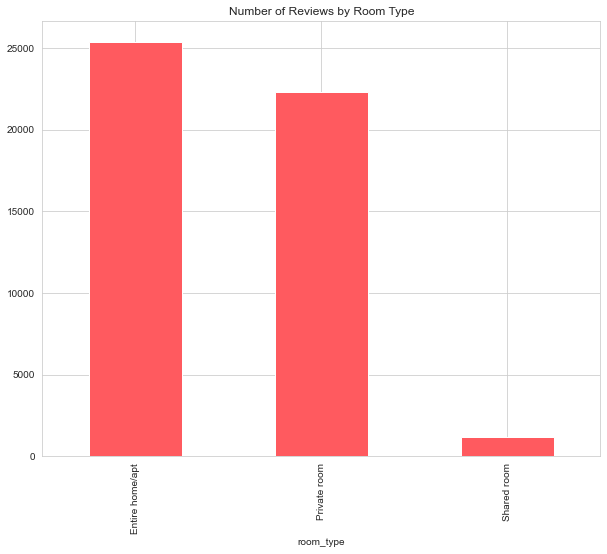

In [35]:
_ = reviews_room_type .plot(kind = 'bar', title = 'Number of Reviews by Room Type',figsize=(10,8), color = '#FF5A5F')

In [36]:
top_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighborhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

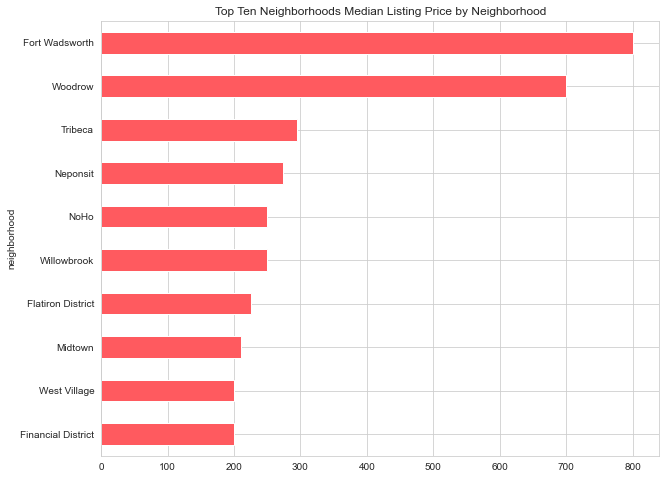

In [34]:
_ = top_ten_neighborhoods.plot(kind = 'barh', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')

In [37]:
bottom_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nsmallest(n=10).sort_values(ascending = True)
bottom_ten_neighborhoods

neighborhood
Concord           34.5
Castle Hill       39.0
Corona            40.0
Hunts Point       40.0
New Dorp Beach    40.0
Tremont           41.0
Bull's Head       45.0
Mount Eden        45.5
Soundview         49.0
Whitestone        49.0
Name: price, dtype: float64

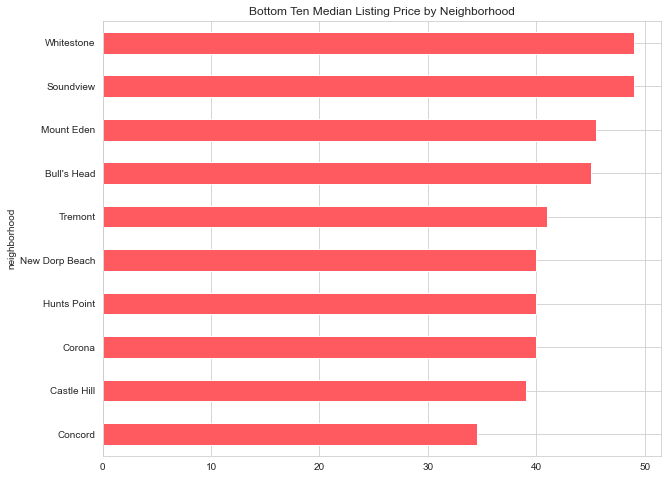

In [38]:
_ = bottom_ten_neighborhoods.plot(kind = 'barh', title = 'Bottom Ten Median Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')

## Geospatial Visualization

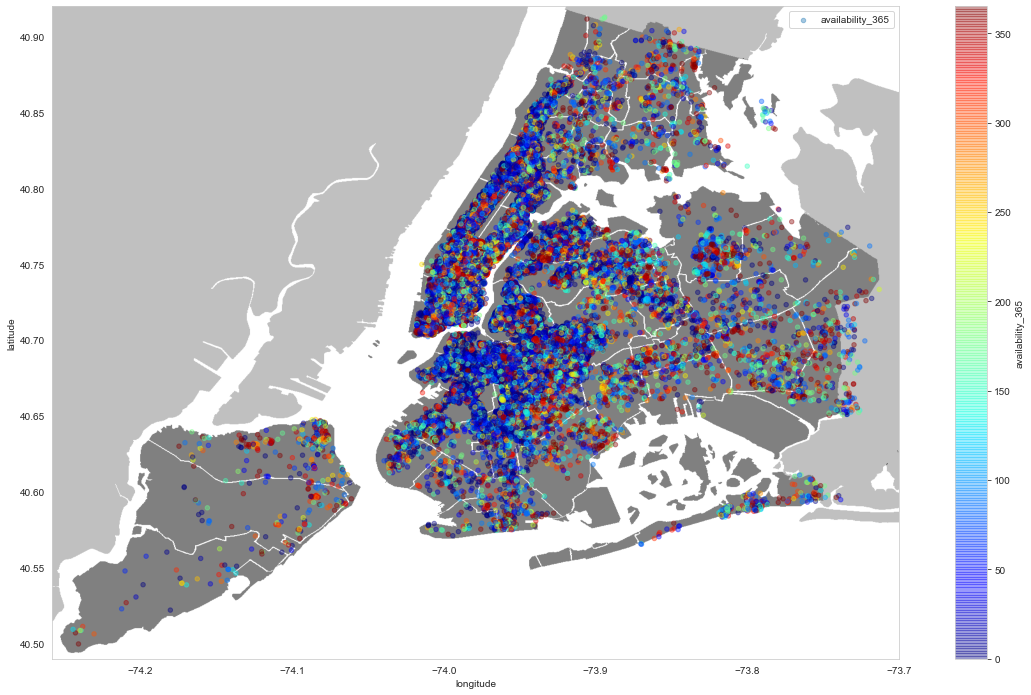

In [39]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

fig = df.plot(kind = 'scatter', x="longitude", y="latitude", label='availability_365', c = 'availability_365',
        ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12), grid = False)


plt.legend()
plt.show()

## Key Findings
* There were several outliers; Because the listing price is arbitrary, I kept the outliers, since the price is not due to error, but the host's decision. 
* Some of the numerical values were positively skewed; Therefore, for the analysis, I chose to focus on the median values, because it is less susceptible to skewed data.
* Entire apartments, unsurprisingly, cost more and had more reviews compared to other room types
* Manhattan and Brooklyn significantly had more listings than the other boroughs
* Lastly, there were several listings in the Bronx that appeared in the bottom ten neighborhoods. Ultimately, location matters, one could argue, for Airbnb listings, but there can be several factors that may contribute such as crime statistics, etc.